In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump

# Load dataset

In [ ]:
path = "/content/WineQT.csv"
df = pd.read_csv(path)

# EDA

In [ ]:
print("Shape:", df.shape)
print(df.columns.tolist())
print("\nSample rows:")
df.head()

Shape: (1143, 13)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

Sample rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data Preprocessing and Exploration

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
print("\nNumeric summary (describe):")
df.describe().T


Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [ ]:
print("\nOriginal 'quality' value counts:")
print(df['quality'].value_counts().sort_index())


Original 'quality' value counts:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


#Visualization
Distribution of original 'quality' ratings

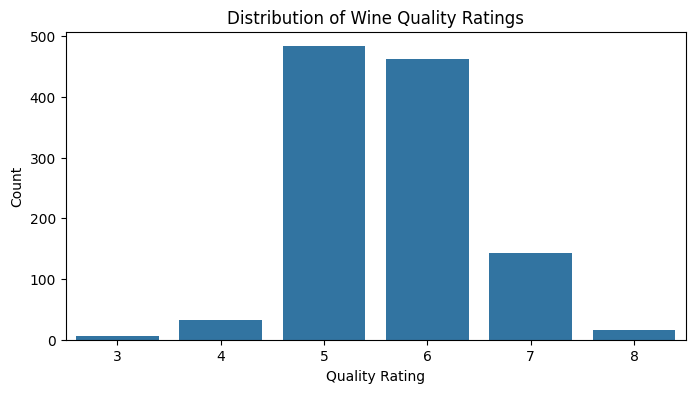

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()

Histograms of key features

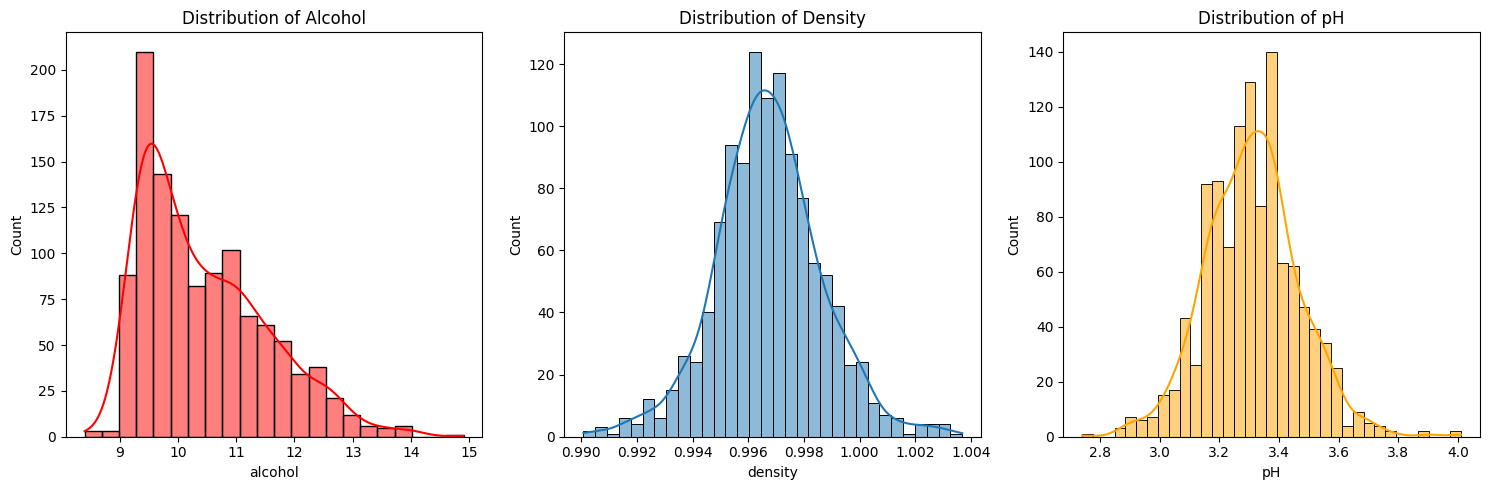

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['alcohol'], kde=True, ax=axes[0],color='red')
axes[0].set_title('Distribution of Alcohol')
sns.histplot(df['density'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Density')
sns.histplot(df['pH'], kde=True, ax=axes[2],color='orange')
axes[2].set_title('Distribution of pH')
plt.tight_layout()
plt.show()

Correlation Heatmap

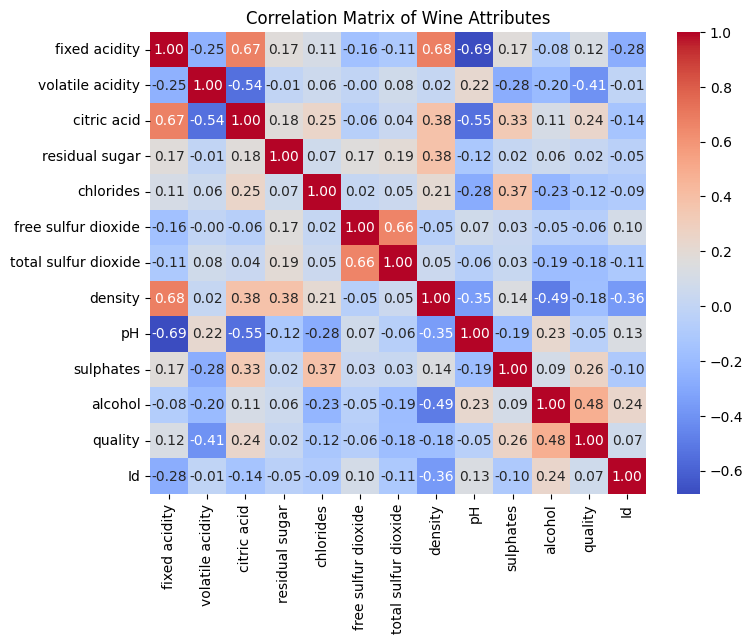

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

Violin Plot for 'Volatile Acidity'

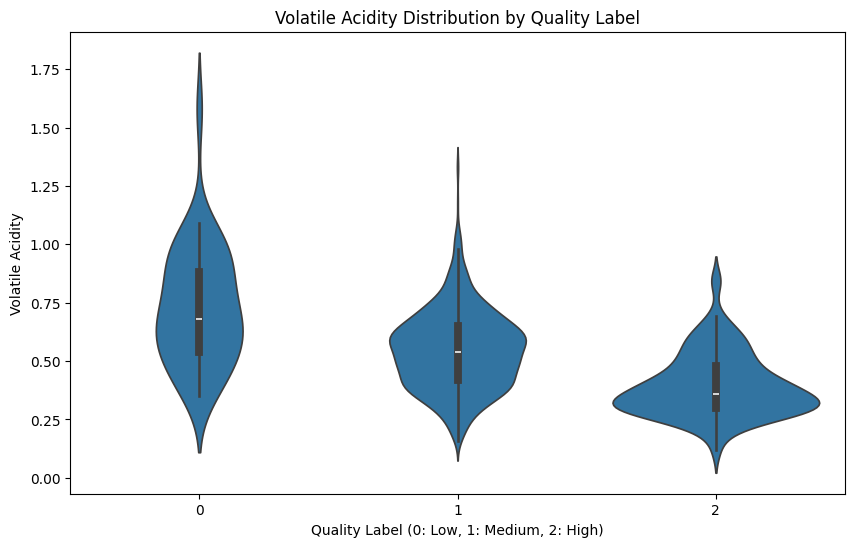

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Step 1: Create quality_label column
def label_quality(value):
    if value <= 4:
        return 0   # Low
    elif value <= 6:
        return 1   # Medium
    else:
        return 2   # High

df['quality_label'] = df['quality'].apply(label_quality)

# Step 2: Plot violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality_label', y='volatile acidity', data=df)

plt.title('Volatile Acidity Distribution by Quality Label')
plt.xlabel('Quality Label (0: Low, 1: Medium, 2: High)')
plt.ylabel('Volatile Acidity')
plt.show()


Bar Plots for Feature Means by Quality

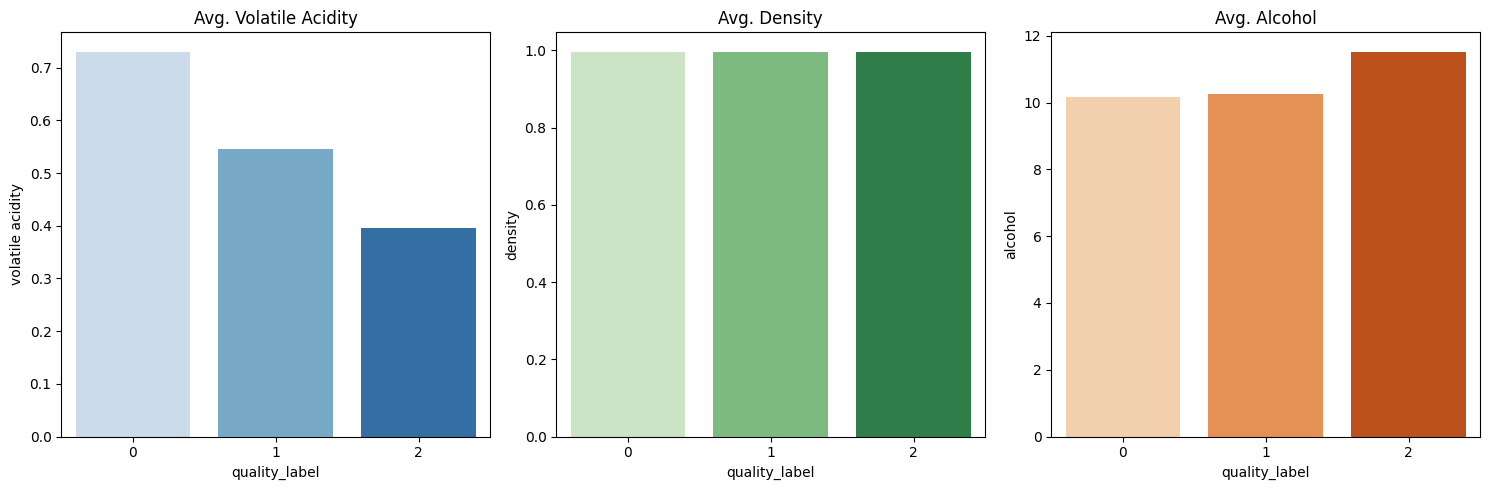

In [ ]:
df_agg = df.groupby('quality_label')[['volatile acidity', 'density', 'alcohol']].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Barplot for Volatile Acidity
sns.barplot(x='quality_label', y='volatile acidity', data=df_agg, ax=axes[0], palette='Blues')
axes[0].set_title('Avg. Volatile Acidity')

# Barplot for Density
sns.barplot(x='quality_label', y='density', data=df_agg, ax=axes[1], palette='Greens')
axes[1].set_title('Avg. Density')

# Barplot for Alcohol
sns.barplot(x='quality_label', y='alcohol', data=df_agg, ax=axes[2], palette='Oranges')
axes[2].set_title('Avg. Alcohol')

plt.tight_layout()
plt.show()

Pair Plot for Key Features

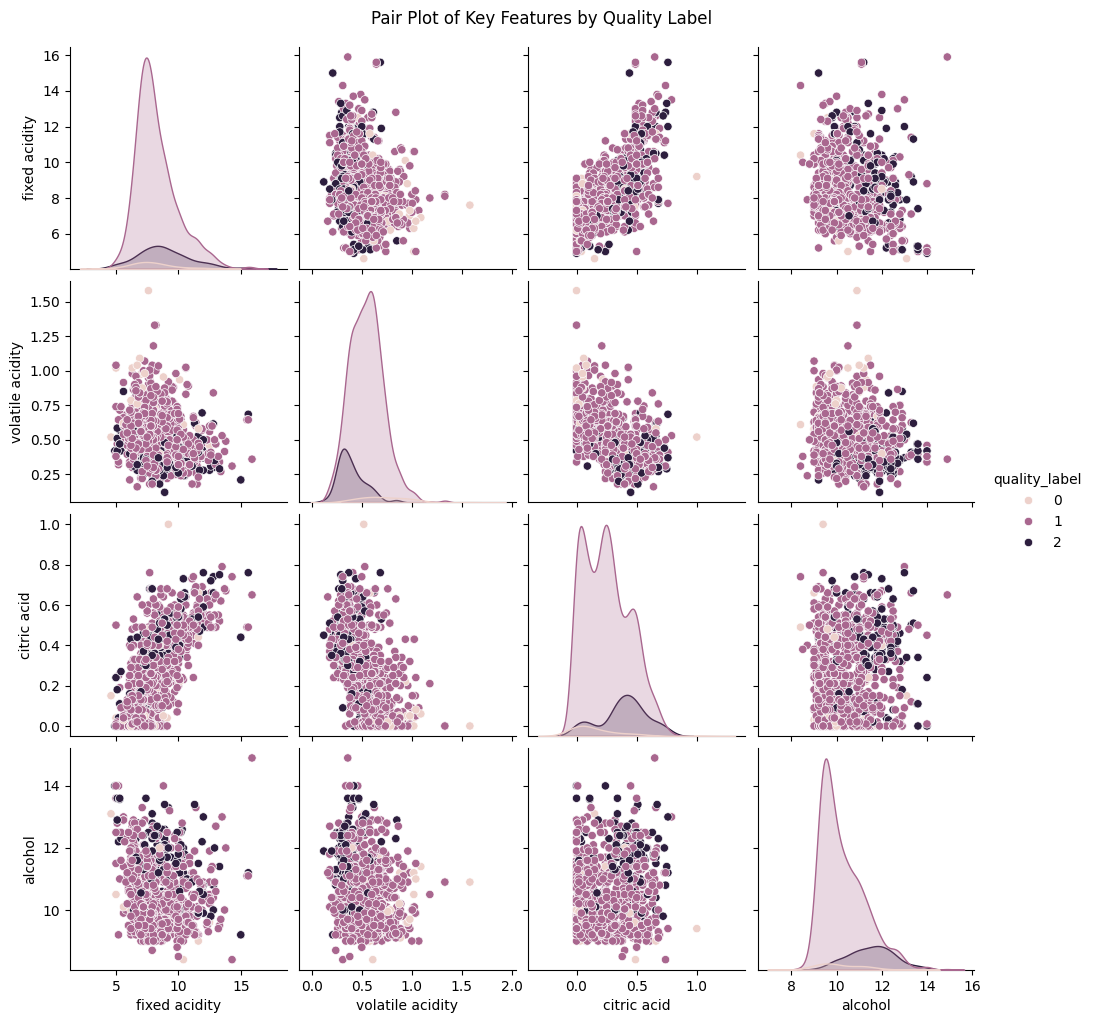

In [ ]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality_label']
sns.pairplot(df[selected_features], hue='quality_label', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Quality Label', y=1.02)
plt.show()

Boxplots of Alcohol vs Quality Label

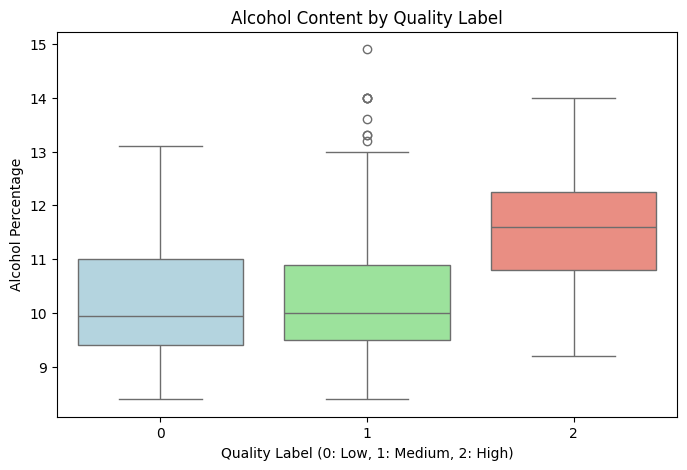

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='quality_label',
    y='alcohol',
    data=df,
    palette=['lightblue', 'lightgreen', 'salmon']  # different colors for each quality label
)
plt.title('Alcohol Content by Quality Label')
plt.xlabel('Quality Label (0: Low, 1: Medium, 2: High)')
plt.ylabel('Alcohol Percentage')
plt.show()

# Features & target

In [ ]:
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality_label']

In [ ]:
# Optional: check correlations (small safe plot)
corr = df.corr()
# Show top correlations (pairs) rather than a heavy heatmap:
corr_unstack = corr.unstack().sort_values(kind="quicksort", ascending=False)
# remove self-correlations
corr_pairs = corr_unstack[corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)]
print("\nTop correlated pairs (highest):")
print(corr_pairs.head(8))


Top correlated pairs (highest):
quality               quality_label           0.809497
quality_label         quality                 0.809497
density               fixed acidity           0.681501
fixed acidity         density                 0.681501
                      citric acid             0.673157
citric acid           fixed acidity           0.673157
free sulfur dioxide   total sulfur dioxide    0.661093
total sulfur dioxide  free sulfur dioxide     0.661093
dtype: float64


# Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (914, 12) Test shape: (229, 12)


#Define models (pipelines for those needing scaling)

In [ ]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SGD": make_pipeline(StandardScaler(),
                         SGDClassifier(loss='log_loss', max_iter=2000, tol=1e-4, random_state=42)),
    "SVC": make_pipeline(StandardScaler(),
                         SVC(kernel='rbf', C=1.0, probability=True, random_state=42))
}


# Train & evaluate

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import SGDClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

results = []

# ✅ Optional: define label names if your target variable is numeric (0, 1)
# Replace these with your actual class names (for example, for heart disease)
label_names = {0: "No Disease", 1: "Disease"}  # <-- update as needed

for name, model in models.items():
    print("\n" + "-"*60)
    print("Training model:", name)

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    preds = model.predict(X_test)

    # Accuracy on test set
    acc = accuracy_score(y_test, preds)
    print(f"Test accuracy ({name}): {acc:.4f}")

    # 5-fold cross-validation
    try:
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        print("CV accuracy (5-fold): {:.4f} ± {:.4f}".format(cv_mean, cv_std))
    except Exception as e:
        print("CV failed:", e)
        cv_mean, cv_std = np.nan, np.nan

    # ✅ Classification report (fixed)
    print("\nClassification report:")
    try:
        print(classification_report(
            y_test,
            preds,
            target_names=[label_names[i] for i in sorted(label_names)]
        ))
    except:
        # fallback if label_names not needed
        print(classification_report(y_test, preds))

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print("Confusion matrix:\n", cm)

    # Save results
    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "CV Mean": cv_mean,
        "CV Std": cv_std
    })

# Convert results to formatted table
results_df = pd.DataFrame(results)
print("\n===== Model Comparison Table =====")
print(results_df.to_string(index=False))



------------------------------------------------------------
Training model: RandomForest
Test accuracy (RandomForest): 0.9039
CV accuracy (5-fold): 0.8128 ± 0.0527

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.91      0.98      0.94       189
           2       0.88      0.66      0.75        32

    accuracy                           0.90       229
   macro avg       0.59      0.55      0.56       229
weighted avg       0.87      0.90      0.88       229

Confusion matrix:
 [[  0   8   0]
 [  0 186   3]
 [  0  11  21]]

------------------------------------------------------------
Training model: SGD
Test accuracy (SGD): 0.8166
CV accuracy (5-fold): 0.7997 ± 0.0631

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.83      0.98      0.90       189
           2       0.25      

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import cross_val_score

results = []

# Define label names (update if your labels are different)
label_names = {0: "Low", 1: "Medium", 2: "High"}

for name, model in models.items():
    print("\n" + "-"*60)
    print("Training model:", name)

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    preds = model.predict(X_test)

    # Accuracy on test set
    acc = accuracy_score(y_test, preds)
    print(f"Test accuracy ({name}): {acc:.4f}")

    # 5-fold cross-validation
    try:
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        print("CV accuracy (5-fold): {:.4f} ± {:.4f}".format(cv_mean, cv_std))
    except Exception as e:
        print("CV failed:", e)
        cv_mean, cv_std = np.nan, np.nan

    # Classification report
    print("\nClassification report:")
    print(classification_report(
        y_test,
        preds,
        target_names=[label_names[i] for i in sorted(label_names)]
    ))

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print("Confusion matrix:\n", cm)

    # Save results
    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "CV Mean": cv_mean,
        "CV Std": cv_std
    })

# Convert results to formatted table
results_df = pd.DataFrame(results)
print("\n===== Model Comparison Table =====")
print(results_df.to_string(index=False))



------------------------------------------------------------
Training model: RandomForest
Test accuracy (RandomForest): 0.9039
CV accuracy (5-fold): 0.8128 ± 0.0527

Classification report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.91      0.98      0.94       189
        High       0.88      0.66      0.75        32

    accuracy                           0.90       229
   macro avg       0.59      0.55      0.56       229
weighted avg       0.87      0.90      0.88       229

Confusion matrix:
 [[  0   8   0]
 [  0 186   3]
 [  0  11  21]]

------------------------------------------------------------
Training model: SGD
Test accuracy (SGD): 0.8166
CV accuracy (5-fold): 0.7997 ± 0.0631

Classification report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         8
      Medium       0.83      0.98      0.90       189
        High       0.25      

# Feature importances (RandomForest)


Top 10 features (RandomForest):
alcohol                 0.126529
volatile acidity        0.123370
sulphates               0.096316
citric acid             0.089128
density                 0.089080
Id                      0.079722
fixed acidity           0.076086
pH                      0.070815
total sulfur dioxide    0.069348
chlorides               0.066575
dtype: float64


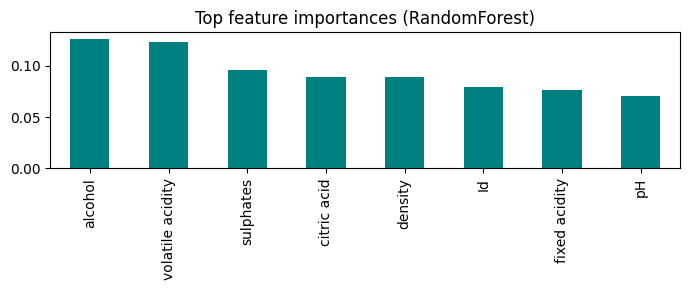

In [ ]:
rf = models['RandomForest']
if hasattr(rf, "feature_importances_"):
    importances = rf.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("\nTop 10 features (RandomForest):")
    print(feat_imp.head(10))

    plt.figure(figsize=(7,3))
    plt.title("Top feature importances (RandomForest)")
    feat_imp.head(8).plot(kind="bar", color='teal')  # change color here
    plt.tight_layout()
    plt.show()
else:
    print("RandomForest does not expose feature_importances_")


# Compare models

In [ ]:
results.append({
    "Model": name,
    "Test Accuracy": acc,
    "CV Mean": cv_mean,
    "CV Std": cv_std
})


In [ ]:
res_df = pd.DataFrame(results).sort_values("Test Accuracy", ascending=False).reset_index(drop=True)
print("\n===== Model Comparison Table =====")
print(res_df.to_string(index=False))



===== Model Comparison Table =====
       Model  Test Accuracy  CV Mean   CV Std
RandomForest       0.903930 0.812779 0.052707
         SVC       0.851528 0.833762 0.019606
         SVC       0.851528 0.833762 0.019606
         SGD       0.816594 0.799651 0.063081


# Recommendation
Correlate Sentiment to App Features.
Determine how the Price, Size, or Category of an app influences its average user Sentiment Polarity.

Focus on Negative Topic Modeling.
Apply Topic Modeling to the negative reviews to automatically identify the few core reasons for user complaints (e.g., ads, bugs, crashes).

Build a Basic Rating Predictor.
Develop a simple Machine Learning model to predict an app's Rating based on its metadata (Installs, Reviews, Category), moving the project toward predictive analytics.